<div align=center>

![Insper](https://upload.wikimedia.org/wikipedia/pt/3/39/Logo_Insper.png)

 **Projeto SuperComputação 2023.2**


*Aluna: Nívea de Abreu Dantas Lima*


**Análise de Redes Sociais: encontrando a clique máxima em um grafo.**
</div>

![Exemplo Clique](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d0/VR_complex.svg/1200px-VR_complex.svg.png)

## Introdução

A análise de redes sociais (ARS) é uma abordagem oriunda de áreas tais como Sociologia, Psicologia Social e Antropologia. Tal abordagem estuda as ligações relacionais (*relational tie*) entre atores sociais. Os atores na ARS podem ser tanto pessoas e empresas, analisadas como unidades individuais, quanto unidades sociais coletivas como, por exemplo, departamentos dentro de uma organização, agências de serviço público em uma cidade, estados-nações de um continente, dentre outras. A ARS difere fundamentalmente de outros estudos pelo fato de que sua ênfase não é nos atributos (características) dos atores, mas nas ligações entre eles.
A idéia de uma clique em um grafo é relativamente simples. No nível mais geral, uma clique é um subconjunto de uma rede no qual os atores são mais próximos entre si do que com outros membros da rede. Em termo de laços de amizade, por exemplo, não é incomum encontrar grupos humanos que formam cliques baseando-se em idade, gênero, raça, etnia, religião, ideologia, e muitas coisas coisas. Uma clique é, portanto, um conjunto de vértices em um grafo em que cada par de vértices está diretamente conectado por uma aresta.

Encontrar a clique máxima em um grafo é uma tarefa computacionalmente desafiadora devido à natureza combinatória do problema.  A dificuldade computacional surge da necessidade de explorar todas as combinações possíveis de vértices para identificar a maior clique, o que se torna exponencial em relação ao número de vértices. Isso resulta em uma complexidade computacional alta, mesmo para grafos moderadamente grandes.

Dessa maneira, o objetivo neste relatório é mostrar uma série de implementações que avaliem as diferentes formas e práticas de buscar resolver este problema, seja obtendo a resposta correta em um tempo impraticável ou buscando soluções aproximadas que sejam obtidas em tempo razoável.

Teremos 3 implementações principais:
* 1 - Busca Exaustiva: Na qual iremos explorar todas as cliques presentes no grafo (tarefa computacionalmente cara) e selecionar posteriormente aquela que tem maior tamanho. Discutiremos também a possibilidade da criação de uma heurística que traga resultados próximos do ideal mas em tempos bem menores.

* 2- Paralelização com OpenMP: Dado ao custo de explorar todos os "branchs" de cliques presentes, podemos dividir essa tarefa em diferentes threads em partes específicas da solução para melhorar sua complexidade temporal e diminuir seu tempo de execução sem perder a solução ótima.

* 3- Computação Distribuída com MPI: Podemos também tentar dividir essa tarefa de busca da clique máxima no grafo em diversas CPU's, o que pode nos indicar formas possíveis de ganho de perfomance, sobretudo em grafos com tamanhos cada vez maiores.

# Configurando Ambiente
A maioria das implementações estarão no repositório fonte deste projeto. Neste Notebook, executaremos as implementações e discutiremos seus resultados frente ao escopo de Computação de Alta performance.  Para isso execute a célula abaixo.

In [2]:
!git clone https://github.com/niveaabreu/Projeto-SuperComp

Cloning into 'Projeto-SuperComp'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 35 (delta 13), reused 23 (delta 8), pack-reused 0
Receiving objects: 100% (35/35), 19.29 KiB | 3.21 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [3]:
%cd Projeto-SuperComp

/content/Projeto-SuperComp


In [6]:
#Gerando um grafo para teste
!python implementações/cria_grafo.py 100

Grafo densamente conectado gerado e salvo em 'grafo.txt'.


# Busca Exaustiva

Uma busca exaustiva, em termos de computação, refere-se a uma abordagem sistemática que examina todas as possibilidades em um espaço de busca para encontrar uma solução. Ela testa cada configuração possível, uma por uma, sem pular nenhuma, até encontrar a solução desejada ou até esgotar todas as combinações possíveis.

A implementação exaustiva aqui implementada seguiu os seguintes passos lógicos:

1. **Leitura e Representação do Grafo:**
   - O código lê um grafo de um arquivo de texto, representando-o através de uma matriz de adjacência que indica as arestas entre vértices.

2. **Verificação de Cliques:**
   - A função `ehClique` verifica se um conjunto de vértices forma uma clique, verificando a conexão entre os pares na matriz de adjacência.

3. **Busca Exaustiva Utilizando uma Pilha:**
   - `EncontraCliques` utiliza uma pilha para busca exaustiva:
     - Para cada vértice individual, cria-se uma pilha contendo os vértices adjacentes a ele.
     - A pilha armazena pares de vetores:
         - O primeiro vetor contém vértices candidatos para a clique.
         - O segundo vetor representa a clique atual.
     - O algoritmo adiciona vértices compatíveis à clique atual e continua a busca por cliques maiores.

4. **Exploração de Possíveis Cliques:**
   - Verifica-se se cada vértice candidato pode ser adicionado à clique atual, verificando sua conexão com os vértices presentes na clique.
   - Os candidatos viáveis são colocados na pilha para consideração em iterações futuras.

5. **Verificação e Atualização da Clique Máxima:**
   - Quando a pilha está vazia, verifica-se se a clique atual é maior do que a clique máxima encontrada até o momento e se é uma clique válida.
   - Se a clique atual for maior e válida, torna-se a nova clique máxima.

Dessa maneira, inspirando-se no pseudo-código fornecido, a implementação exaustiva é dada pelo código abaixo:

```cpp
#include <iostream>
#include <fstream>
#include <vector>
#include <string>
#include <cmath>
#include <algorithm>
#include <stack>

using namespace std;

bool maiorQue(int a, int b) {
    return a < b;
}

vector<vector<int>> LeGrafo(const std::string& nomeArquivo, int& numVertices) {
    ifstream arquivo(nomeArquivo);
    int numArestas;
    arquivo >> numVertices >> numArestas;

    vector<vector<int>> grafo(numVertices, vector<int>(numVertices, 0));

    for (int i = 0; i < numArestas; ++i) {
        int u, v;
        arquivo >> u >> v;
        grafo[u - 1][v - 1] = 1;
        grafo[v - 1][u - 1] = 1;  // O grafo é não direcionado
    }

    arquivo.close();

    return grafo;
}

bool ehClique(vector<int>& candidatos, vector<vector<int>>& grafo) {
    int n = candidatos.size();
    for (int i = 0; i < n; ++i) {
        for (int j = i + 1; j < n; ++j) {
            if (grafo[candidatos[i]][candidatos[j]] == 0) {
                return false;
            }
        }
    }
    return true;
}

void EncontraCliques(vector<vector<int>>& grafo, vector<int>& candidatos, vector<int>& cliqueMaximal) {
    stack<pair<vector<int>, vector<int>>> pilhaCliques;

    for (int i = 0; i < candidatos.size(); ++i) {
        vector<int> cliqueAtual;
        vector<int> candidatosAtuais(candidatos.begin() + i + 1, candidatos.end());

        int v = candidatos[i];
        cliqueAtual.push_back(v);

        // Encontra todas as cliques maximais incluindo v
        vector<int> novosCandidatos;
        for (int u : candidatosAtuais) {
            if (grafo[v][u] == 1) {
                novosCandidatos.push_back(u);
            }
        }

        pilhaCliques.push({novosCandidatos, cliqueAtual});
    }

    while (!pilhaCliques.empty()) {
        auto [candidatos, cliqueAtual] = pilhaCliques.top();
        pilhaCliques.pop();

        if (candidatos.empty()) {
            if (cliqueAtual.size() > cliqueMaximal.size() && ehClique(cliqueAtual, grafo)) {
                cliqueMaximal = cliqueAtual;
            }
        } else {
            int v = candidatos.back();
            candidatos.pop_back();

            // Inclui o vértice v na clique atual
            cliqueAtual.push_back(v);

            // Encontra todas as cliques maximais incluindo v
            vector<int> novosCandidatos;
            for (int u : candidatos) {
                if (grafo[v][u] == 1) {
                    novosCandidatos.push_back(u);
                }
            }

            pilhaCliques.push({novosCandidatos, cliqueAtual});

            // Exclui o vértice v da clique atual
            cliqueAtual.pop_back();

            // Encontra todas as cliques maximais sem v
            pilhaCliques.push({candidatos, cliqueAtual});
        }
    }
}

vector<int> EncontraCliqueMaxima(vector<vector<int>>& grafo) {
    int numVertices = grafo.size();
    vector<int> candidatos;
    for (int i = 0; i < numVertices; ++i) {
        candidatos.push_back(i);
    }
    vector<int> cliqueMaximal;
    EncontraCliques(grafo, candidatos, cliqueMaximal);
    return cliqueMaximal;
}

int main() {
    int numVertices;
    vector<vector<int>> grafo;

    grafo = LeGrafo("grafo.txt", numVertices);
    vector<int> cliqueMaxima = EncontraCliqueMaxima(grafo);
    sort(cliqueMaxima.begin(), cliqueMaxima.end(), maiorQue);
    cout << "EXAUSTIVA: " << cliqueMaxima.size() << " Clique Maximal: ";
    for (int v : cliqueMaxima) {
        cout << v + 1 << " ";
    }
    cout << endl;

    return 0;
}

```

#### Verificando a implementação
Iremos compilar e executar essa implementação para ver seus resultados e comparação de resultados em relação ao código de verificação.

In [12]:
!g++ -Wall -O3 implementações/exaustiva.cpp -o exaustiva

In [13]:
!./exaustiva

EXAUSTIVA: 15 Clique Maximal: 14 19 24 36 42 51 66 68 69 81 86 87 90 97 100 


In [14]:
!python implementações/verificagrafo.py

Clique máxima encontrada: ['100', '66', '69', '81', '51', '14', '68', '87', '36', '42', '19', '24', '86', '90', '97']
Tamanho:  15


Podemos ver que a busca exaustiva de fato está conseguindo retornar a clique máxima, conforme nosso objetivo inicial.
Iremos agora, mudar o tamanho do grafo e verificar seu tempo de execução, permitindo-nos ver qual é o grande contraponto de uma busca exaustiva.

Geraremos grafos de tamanhos 20,40,60,80,100 e 120 para verificação de seu tempo de execução.

In [27]:
import subprocess
import time

tempo_exaustiva = []
tamanho_clique_exaustiva = []
tempos_verificacao = []
tamanho_clique_verificacao = []
tamanhos = [20,40,60,80,100,120]
for i in tamanhos:
  subprocess.run(['python',"implementações/cria_grafo.py",str(i)])

  inicio = time.perf_counter()
  exaustiva = subprocess.run(['./exaustiva'], text=True, capture_output=True)
  fim = time.perf_counter()
  tempo_exaustiva.append(fim-inicio)
  tamanho_clique_exaustiva.append(exaustiva.stdout.split(":")[1].split(" ")[1])

  inicio = time.perf_counter()
  proc_verification = subprocess.run(['python', 'implementações/verificagrafo.py'], text=True, capture_output=True)
  fim = time.perf_counter()
  tempos_verificacao.append(fim-inicio)
  tamanho_clique_verificacao.append(proc_verification.stdout.split(":")[-1].strip())

In [32]:
import pandas as pd
#Veremos aqui se os tamanhos das cliques foram os mesmos
df = pd.DataFrame()
df["Tamanho Grafo"] = tamanhos
df["Tamanho Clique Exaustiva"] = tamanho_clique_exaustiva
df["Tamanho Clique verificação"] = tamanho_clique_verificacao
df

,Tamanho Grafo,Tamanho Clique Exaustiva,Tamanho Clique verificação
0,20,7,7
1,40,10,10
2,60,13,13
3,80,13,13
4,100,14,14
5,120,14,14


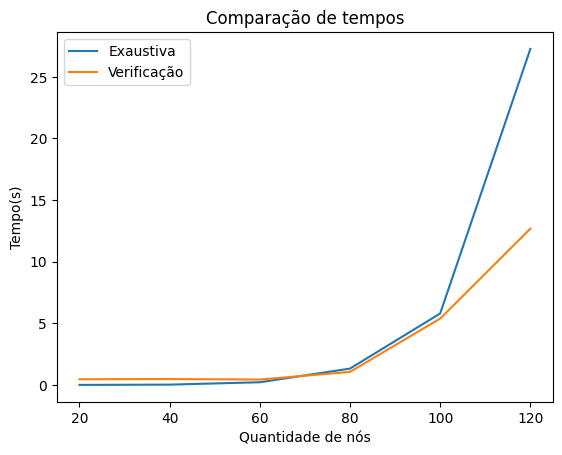

In [33]:
import matplotlib.pyplot as plt
plt.plot(tamanhos, tempo_exaustiva, label='Exaustiva')
plt.plot(tamanhos, tempos_verificacao, label='Verificação')

plt.xlabel('Quantidade de nós')
plt.ylabel('Tempo(s)')
plt.title('Comparação de tempos')
plt.legend()
plt.show()

Como podemos ver pelo dataframe, de fato, sempre conseguimos obter os melhores resultados (considerados ótimos). Todavia, para grafos com maiores, tamanhos acima de 100 nós, vemos que o tempo de execução torna-se cada vez mais inviável.  Isso ocorre, visto que ao enumerar todas as possibilidades de cliques, analisando se um dado nó pertence ou não a clique analisada, eleva a complexidade do problema para exponencial, o que implica que quão maior o grafo de entrada, a tendência é de maior tempo de execução.

Dessa forma, vemos que para grafos com entradas maiores que 250 nós, o tempo de processamento torna-se inviável (um pouco maior que 15 minutos). Dessa forma, pode ser válido pensarmos em estratégias que tentem reduzir esse tempo de execução.

#### Heurística Gulosa em função do grau de Adjência
Neste sentido, ao invés de analisar todas as cliques dentro do grafo, podemos escolher um critério de decisão, por exemplo a quantidade de arestas que um nó possui (Adjacência) e partir desse critério para encontrar uma clique maior, sem ter que necessariamente explorar todo o grafo. Em termos de pseudo código podemos pensar no código da seguinte forma:

```
Função EncontraCliqueMaximaHeuristica(grafo):
    cliqueMaxima = []
    Ordenar vértices por grau de adjacência em ordem decrescente

    Para cada vértice v em grafo ordenado por grau:
        Se v pode ser adicionado a cliqueMaxima sem violar a propriedade de clique:
            Adicionar v a cliqueMaxima

    Retornar cliqueMaxima

```

Baseando-se no esqueleto de nosso código, este será adaptado da seguinte forma:

```cpp
#include <iostream>
#include <fstream>
#include <vector>
#include <algorithm>

using namespace std;

struct GrauVertice {
    int vertice;
    int grau;

    bool operator<(const GrauVertice& outro) const {
        return grau > outro.grau; // Ordena em ordem decrescente de grau
    }
};

vector<vector<int>> LerGrafo(const string& nomeArquivo, int& numVertices) {
    ifstream arquivo(nomeArquivo);
    int numArestas;
    arquivo >> numVertices >> numArestas;

    vector<vector<int>> grafo(numVertices, vector<int>(numVertices, 0));

    for (int i = 0; i < numArestas; ++i) {
        int u, v;
        arquivo >> u >> v;
        grafo[u - 1][v - 1] = 1;
        grafo[v - 1][u - 1] = 1;  // O grafo é não direcionado
    }

    arquivo.close();

    return grafo;
}

vector<int> CliqueMaxima(vector<vector<int>>& grafo, int numVertices) {
    vector<GrauVertice> graus;

    // Calcula o grau de cada vértice
    for (int i = 0; i < numVertices; ++i) {
        int grau = 0;
        for (int j = 0; j < numVertices; ++j) {
            if (grafo[i][j] == 1) {
                grau++;
            }
        }
        graus.push_back({i, grau});
    }

    // Ordena os vértices por grau de adjacência
    sort(graus.begin(), graus.end());

    vector<int> cliqueMaxima;
    vector<int> candidatos;

    for (const auto& vertice : graus) {
        candidatos.push_back(vertice.vertice);
    }

    while (!candidatos.empty()) {
        int v = candidatos.back();
        candidatos.pop_back();
        bool podeAdicionar = true;

        for (size_t i = 0; i < cliqueMaxima.size(); ++i) {
            int u = cliqueMaxima[i];
            if (grafo[u][v] == 0) {
                podeAdicionar = false;
                break;
            }
        }

        if (podeAdicionar) {
            cliqueMaxima.push_back(v);
            vector<int> novosCandidatos;

            for (size_t i = 0; i < candidatos.size(); ++i) {
                int u = candidatos[i];
                bool adjacenteATodos = true;

                for (size_t j = 0; j < cliqueMaxima.size(); ++j) {
                    int c = cliqueMaxima[j];
                    if (grafo[u][c] == 0) {
                        adjacenteATodos = false;
                        break;
                    }
                }

                if (adjacenteATodos) {
                    novosCandidatos.push_back(u);
                }
            }

            candidatos = novosCandidatos;
        }
    }

    return cliqueMaxima;
}

int main() {
    vector<vector<int>> grafo;
    int numVertices;
    grafo = LerGrafo("grafo.txt", numVertices);
    vector<int> cliqueMaxima = CliqueMaxima(grafo, numVertices);

    cout << "Clique Máxima (Heurística): " << cliqueMaxima.size();
    cout << " Vértices da Clique Máxima:" << endl;
    for (int elemento : cliqueMaxima) {
        cout << elemento + 1 << " "; // Adicionando 1 para representar o índice real do vértice
    }

    return 0;
}
```

Podemos então, comparar essa implementação com a busca exaustiva para averiguar o quão bom suas soluções chegam perto da solução ótima em detrimento de um tempo de execução bem menor.

In [49]:
!g++ -Wall -O3 implementações/heuristica.cpp -o heuristica

In [50]:
!./heuristica

Clique Máxima (Heurística): 9 Vértices da Clique Máxima:
51 61 72 34 60 74 1 68 47 

In [51]:
import subprocess
import time

tempo_exaustiva = []
tamanho_clique_exaustiva = []
tempos_heuristica = []
tamanho_clique_heuristica = []
tamanhos = [20,40,60,80,100,120]
for i in tamanhos:
  subprocess.run(['python',"implementações/cria_grafo.py",str(i)])

  inicio = time.perf_counter()
  exaustiva = subprocess.run(['./exaustiva'], text=True, capture_output=True)
  fim = time.perf_counter()
  tempo_exaustiva.append(fim-inicio)
  tamanho_clique_exaustiva.append(exaustiva.stdout.split(":")[1].split(" ")[1])

  inicio = time.perf_counter()
  heuristica = subprocess.run(['./heuristica'], text=True, capture_output=True)
  fim = time.perf_counter()
  tempos_heuristica.append(fim-inicio)
  tamanho_clique_heuristica.append(heuristica.stdout.split(":")[1].split(" ")[1])



In [52]:
import pandas as pd
#Veremos aqui se os tamanhos das cliques foram os mesmos
df = pd.DataFrame()
df["Tamanho Grafo"] = tamanhos
df["Tamanho Clique Exaustiva"] = tamanho_clique_exaustiva
df["Tamanho Clique verificação"] = tamanho_clique_heuristica
df

,Tamanho Grafo,Tamanho Clique Exaustiva,Tamanho Clique verificação
0,20,7,7
1,40,9,7
2,60,13,8
3,80,14,8
4,100,15,8
5,120,15,9


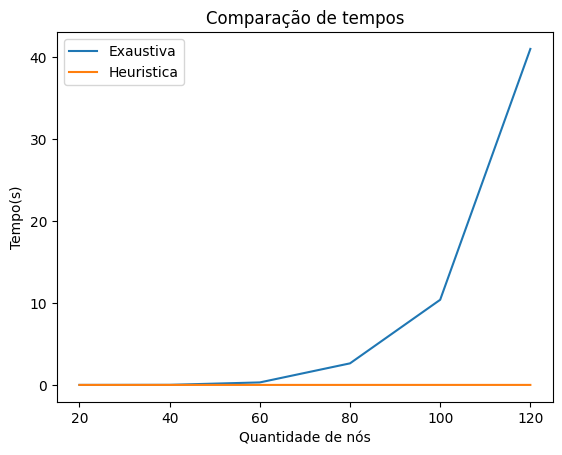

In [53]:
import matplotlib.pyplot as plt
plt.plot(tamanhos, tempo_exaustiva, label='Exaustiva')
plt.plot(tamanhos, tempos_heuristica, label='Heuristica')

plt.xlabel('Quantidade de nós')
plt.ylabel('Tempo(s)')
plt.title('Comparação de tempos')
plt.legend()
plt.show()

Conforme vemos pela tabela, a heurística, apesar de promissora e mostrar resultados adequados em alguns pontos isolados, não chega tão perto da solução ótima. Todavia, averiguamos que o tempo de execução para procura dessa clique é incrivelmente menor em relação a busca Exaustiva.
Em termos de grafos com entradas extramamente grandes, pode fazer sentido amplificar essa heurísitica, por exemplo, realizar podas ou buscar o critério de escolha para que ela se aproxime da solução ótima e mantendo o tempo de execução baixo.
Algumas outras possíveis melhorias:
* Memoization: Guardar cliques ou partes do grafo já visitadas
* Podas: Caso se visite uma parte do grafo que já foi verificada, interromper a busca para evitar tempo de execução desnecessário.


# Implementação com Threads OpenMP

Vimos como a busca exaustiva é cara em termos computacionais para ser realizada integralmente serial. Dessa forma, podemos tentar paralelizar algumas partes desse código que não possuem dependência para melhorar seu desempenho em termos de tempo de execução, utilizando a biblioteca OpenMP que permite a utilização e orquestração de diversos threads para tarefas passíveis de paralelização.

Para isso, podemos paralelizar algumas sessões da busca exaustiva, buscando dividi-la para processamento paralelizado. Algumas dessas que são possíveis:
* Função de decisão acerca se um dado grupo de cadidatos é uma clique: Interessante visto que iremos iterar um subgrafo, permitindo de maneira adequada analisar caso não seja uma clique.
* Decisão sobre os candidatos a serem analisados: É necessário escolher quais serão os nós candidatos em uma dada clique, e como não necessariamente existe uma depedência entre esses, podemos dividir esse preenchimento em diferentes threads.

Assim nosso código fica da seguinte maneira:

```cpp
#include <iostream>
#include <fstream>
#include <vector>
#include <string>
#include <cmath>
#include <algorithm>
#include <stack>
#include <omp.h>

using namespace std;

bool maiorQue(int a, int b) {
    return a > b; // Changed comparison function
}

vector<vector<int>> LeGrafo(const std::string& nomeArquivo, int& numVertices) {
    ifstream arquivo(nomeArquivo);
    int numArestas;
    arquivo >> numVertices >> numArestas;

    vector<vector<int>> grafo(numVertices, vector<int>(numVertices, 0));
    for (int i = 0; i < numArestas; ++i) {
        int u, v;
        arquivo >> u >> v;
        grafo[u - 1][v - 1] = 1;
        grafo[v - 1][u - 1] = 1;  // The graph is undirected
    }

    arquivo.close();

    return grafo;
}

bool ehClique(vector<int>& candidatos, vector<vector<int>>& grafo) {
    int n = candidatos.size();
    bool cliqueEncontrada = true;

    #pragma omp parallel for collapse(2) shared(cliqueEncontrada)
    for (int i = 0; i < n; ++i) {
        for (int j = i + 1; j < n; ++j) {
            if (grafo[candidatos[i]][candidatos[j]] == 0) {
                #pragma omp critical
                cliqueEncontrada = false;
            }
        }
    }

    return cliqueEncontrada;
}

void EncontraCliques(vector<vector<int>>& grafo, vector<int>& candidatos, vector<int>& cliqueMaximal) {
    stack<pair<vector<int>, vector<int>>> pilhaCliques;

    #pragma omp parallel for shared(pilhaCliques, cliqueMaximal)
    for (size_t i = 0; i < candidatos.size(); ++i) {
        vector<int> cliqueAtual;
        vector<int> candidatosAtuais(candidatos.begin() + i + 1, candidatos.end());

        int v = candidatos[i];
        #pragma omp critical
        cliqueAtual.push_back(v);

        vector<int> novosCandidatos;
        for (int u : candidatosAtuais) {
            if (grafo[v][u] == 1) {
                novosCandidatos.push_back(u);
            }
        }
        #pragma omp critical
        pilhaCliques.push({novosCandidatos, cliqueAtual});
    }

    while (!pilhaCliques.empty()) {
        auto [candidatos, cliqueAtual] = pilhaCliques.top();
        pilhaCliques.pop();

        if (candidatos.empty()) {
            if (cliqueAtual.size() > cliqueMaximal.size() && ehClique(cliqueAtual, grafo)) {
                cliqueMaximal = cliqueAtual;
            }
        } else {
            int v = candidatos.back();
            candidatos.pop_back();

            cliqueAtual.push_back(v);

            vector<int> novosCandidatos;
            for (int u : candidatos) {
                if (grafo[v][u] == 1) {
                    novosCandidatos.push_back(u);
                }
            }

            pilhaCliques.push({novosCandidatos, cliqueAtual});

            cliqueAtual.pop_back();

            pilhaCliques.push({candidatos, cliqueAtual});
        }
    }
}

vector<int> EncontraCliqueMaxima(vector<vector<int>>& grafo) {
    int numVertices = grafo.size();
    vector<int> candidatos;
    for (int i = 0; i < numVertices; ++i) {
        candidatos.push_back(i);
    }
    vector<int> cliqueMaximal;
    EncontraCliques(grafo, candidatos, cliqueMaximal);
    return cliqueMaximal;
}

int main() {
    int numVertices;
    vector<vector<int>> grafo;
    omp_set_num_threads(4);
    grafo = LeGrafo("grafo.txt", numVertices);
    vector<int> cliqueMaxima = EncontraCliqueMaxima(grafo);
    sort(cliqueMaxima.begin(), cliqueMaxima.end(), maiorQue);
    cout << "Paralelizada: " << cliqueMaxima.size() << " Maximal Clique: ";
    for (int v : cliqueMaxima) {
        cout << v + 1 << " ";
    }
    cout << endl;

    return 0;
}
```

In [160]:
!g++ -Wall -O3 -fopenmp implementações/threads_openmp.cpp -o threads_openmp

In [161]:
import subprocess
import time

tempo_exaustiva = []
tamanho_clique_exaustiva = []
tempos_paralelo = []
tamanho_clique_paralelo = []
tamanhos = [20,40,60,80,100,120]
for i in tamanhos:
  subprocess.run(['python',"implementações/cria_grafo.py",str(i)])

  inicio = time.perf_counter()
  exaustiva = subprocess.run(['./exaustiva'], text=True, capture_output=True)
  fim = time.perf_counter()
  tempo_exaustiva.append(fim-inicio)
  tamanho_clique_exaustiva.append(exaustiva.stdout.split(":")[1].split(" ")[1])

  inicio = time.perf_counter()
  paralelo = subprocess.run(['./threads_openmp'], text=True, capture_output=True,check=True)
  fim = time.perf_counter()
  tempos_paralelo.append(fim-inicio)
  tamanho_clique_paralelo.append(paralelo.stdout.split(":")[1].split(" ")[1])



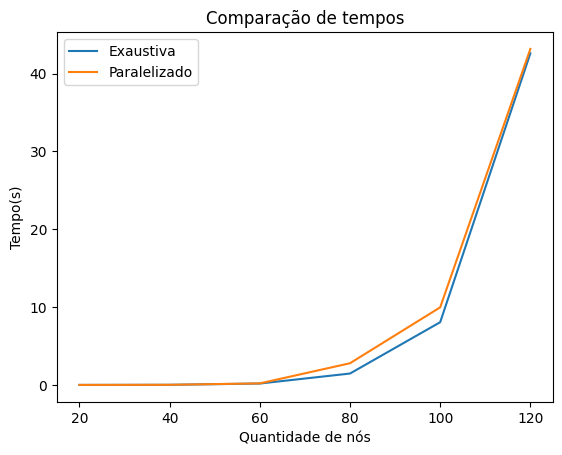

In [162]:
import matplotlib.pyplot as plt
plt.plot(tamanhos, tempo_exaustiva, label='Exaustiva')
plt.plot(tamanhos, tempos_paralelo, label='Paralelizado')
plt.ylabel('Tempo(s)')
plt.xlabel('Quantidade de nós')
plt.title('Comparação de tempos')
plt.legend()
plt.show()

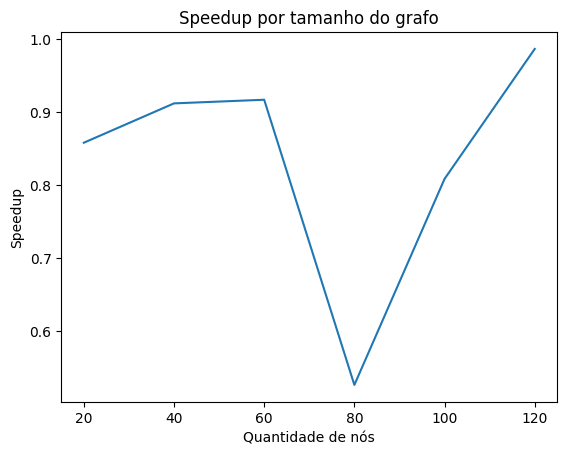

In [165]:
import matplotlib.pyplot as plt
speedups = [x/y for (x,y) in zip(tempo_exaustiva,tempos_paralelo)]
plt.plot(tamanhos, speedups)
plt.ylabel('Speedup')
plt.xlabel('Quantidade de nós')
plt.title('Speedup por tamanho do grafo')
plt.show()

In [171]:

tempo_medio_exaustiva = sum(tempo_exaustiva) / len(tempo_exaustiva)


tempo_medio_paralelo = sum(tempos_paralelo) / len(tempos_paralelo)


speedup = tempo_medio_exaustiva / tempo_medio_paralelo

print(f"Tempo médio exaustiva: {tempo_medio_exaustiva:.2f}s")
print(f"Tempo médio paralelo: {tempo_medio_paralelo:.2f}s")
print(f"Speedup: {speedup:.2f}")

Tempo médio exaustiva: 8.72s
Tempo médio paralelo: 9.36s
Speedup: 0.93


Conforme podemos ver pelas implementações acima, a implementação paralelizada praticamente não mostrou nenhuma melhoria em relação a implementação serial, tendo um speedup muito próximo de 1 (o que siginifica um ganho quase nulo) e tendo seu tempo de execução muito próximo do código serializado.
Isso se deve, principalmente a característica do problema, que ao procurar no grafo cliques candidatas, leva-se em conta a ordem em que se vasculha os nós, gerando em boa parte da implementação uma dependência.

Ademais, nas partes paralelizadas, nota-se que mesmo paralelizando-as, foi necessário modificar um pouco de sua interface original com intuito de conseguir extrair ganho da paralelização sobretudo no "pior caso", que ocorre quando de fato é necessário iterar, por exemplo, todo um grupo de candidatos em busca de se averiguar se é uma clique ou não. Todavia, apesar de melhorar a busca nesse pior caso, a tendência é que em casos iniciais e médios, essa implementação também deva aumentar o tempo de execução em comparação com a serial, visto que mesmo nesses casos é necessário iterar todo o grupo de candidatos, enquanto na parte serial, ao se detectar que não se trata de uma clique, não é necessário mais se verificar os outros candidatos; processo esse mais dificil de ser coordenado via Threads.

Desse modo, apesar da paralelização ser uma boa alternativa para qualquer problema que tenha partes de código sem dependências ela não é necesseriamente uma garantia de aumento de velocidade, como vimos acima.